---
title: Lab 1 for GSB 544
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

**Task 1**

**List of aesthetics being used and their variables:**

    1. x = Income
    2. y = Life Expectancy
    3. size = Population of Country
    4. color = World Region
    5. time = Year


In [ ]:
# Importing q1data

import pandas as pd

# Load the CSV
q1data = pd.read_csv('DataLab1/q1data.csv')

# Check if loaded: showing first few rows
q1data.head()


,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [ ]:

# Importing plotnine items
from plotnine import ggplot, aes, geom_point, scale_size, scale_color_manual, labs, theme_minimal, scale_x_log10, facet_wrap


/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 4 rows containing missing values.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


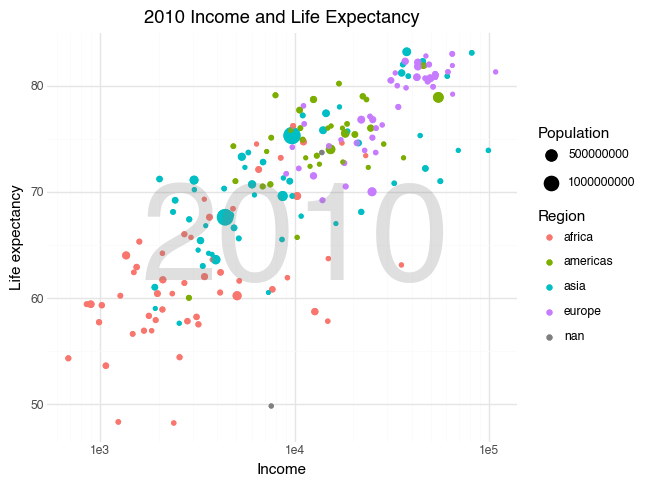

In [ ]:
# Creating Task 1 geom_point plot

from plotnine import geom_point, annotate
(ggplot(q1data, aes(x = "income", y = "life_exp", size = "population", color = "four_regions", label = "country"))
+ geom_point() 
+geom_point(alpha = 0.7)
+scale_x_log10()
+labs(
    title = "2010 Income and Life Expectancy",
    x = "Income",
    y = "Life expectancy",
    size = "Population",
    color = "Region"
)
+theme_minimal()
+annotate(
    'text',
        x=10000,      
        y=65,        
        label='2010',
        size=100,      # size
        alpha=0.25,    # transparency
        color='gray')
)


Besides geom_point, you could use 2d geometries like geom_density_2d, geom_bin2d, geom_smooth, or geom_hex. 

Below is the plot of the geometry, geom_density_2d. It is good for visualizing the data because it illustrates where points cluster, is a simple visualization, and shows a trend. We see that income and life expectancy seem to be positively related. However, we can no longer see the individual country information, there are no colors to determine the regions, and it does not fill the areas (only has outlines). This lacks a lot of information that the geom_point plto gave us. 

/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_density_2d : Removed 2 rows containing non-finite values.


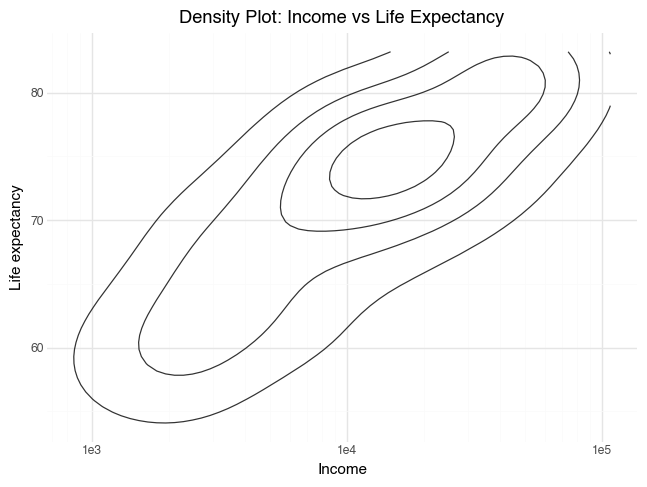

In [ ]:
# Creating Task 1 Alternative Plot- geom_density_2d

from plotnine import (ggplot, aes, geom_density_2d, scale_x_log10, labs, theme_minimal)

(ggplot(q1data, aes( x = "income", y = "life_exp"))
+geom_density_2d(alpha = 0.8)
+scale_x_log10()
+labs(
    title = "Density Plot: Income vs Life Expectancy",
    x = "Income",
    y = "Life expectancy",
)
+theme_minimal()
)

**Task 2**

**List of aesthetics being used and their variables:**

    1. x = Exports
    2. y = Imports
    3. size = Population of Country
    4. color = World Region
    5. time = Year

In [ ]:
# Importing q2data

import pandas as pd

# Load the CSV from folder 
q2data = pd.read_csv('DataLab1/q2data.csv')

# Check if loaded: showing first few rows
q2data.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [ ]:

# Merge population from q1data into q2data based on country

q2datamerge = pd.merge(q2data, q1data[["country", "population"]], on = "country", how = "left")
q2datamerge.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region,population
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia,29200000.0
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia,2950000.0
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa,36000000.0
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa,23400000.0


/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 42 rows containing missing values.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 42 rows containing missing values.


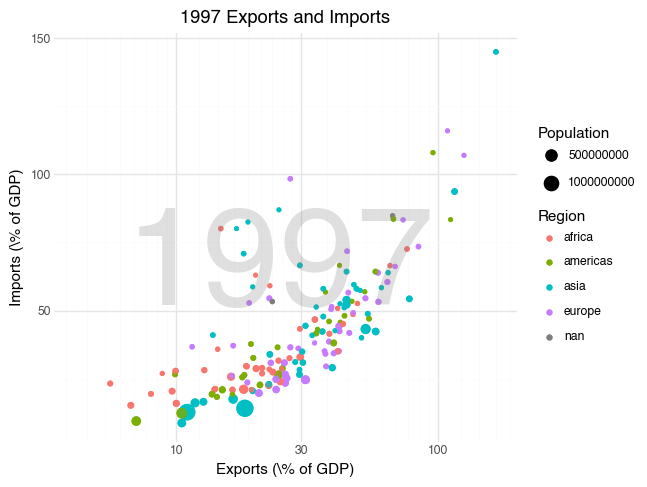

In [ ]:
# Creating Task 2 geom_point plot

from plotnine import geom_point, annotate
(ggplot(q2datamerge, aes(x = "exports", y = "imports", size = "population", color = "four_regions", label = "country"))
+ geom_point() 
+geom_point(alpha = 0.7)
+scale_x_log10()
+labs(
    title = "1997 Exports and Imports",
    x = "Exports (\% of GDP)",
    y = "Imports (\% of GDP)",
    size = "Population",
    color = "Region"
)
+theme_minimal()
+annotate(
    'text',
        x=25,      
        y=65,         
        label='1997',
        size=100,      # size
        alpha=0.25,    # transparency
        color='gray')
)

Besides geom_point, you could use 2d geometries like geom_density_2d, geom_bin2d, geom_smooth, or geom_hex.

Below is the plot for geom_bin2d. This plot is good for visualizing because it highlights where many countries are concentrated, demonstrates a relationship between imports and exports, and uses colors to highlight areas of certain concentration levels. It has downsides, including the lack of information given for population size or region origin and it does not show individual countries.    

/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin_2d : Removed 35 rows containing non-finite values.


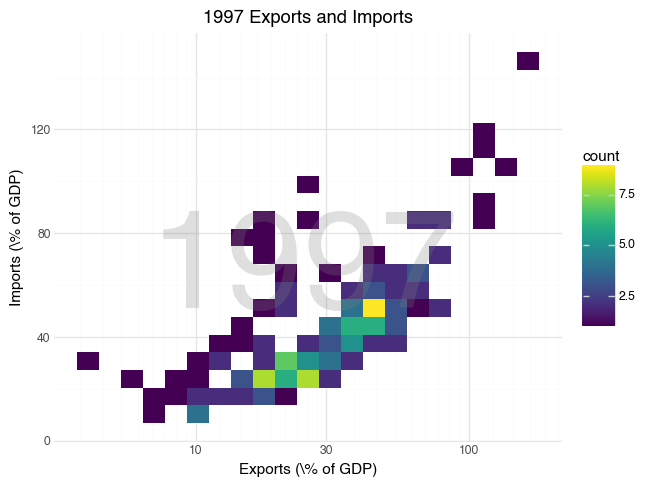

In [ ]:
# Creating Task 2 Alternative Plot- geom_bin2d

from plotnine import geom_bin2d, annotate
(ggplot(q2datamerge, aes(x = "exports", y = "imports"))
+ geom_bin2d(bins = 20) 
+scale_x_log10()
+labs(
    title = "1997 Exports and Imports",
    x = "Exports (\% of GDP)",
    y = "Imports (\% of GDP)",
    size = "Population",
    color = "Region"
)
+theme_minimal()
+annotate(
    'text',
        x=25,      
        y=65,         
        label='1997',
        size=100,      # size
        alpha=0.25,    # transparency
        color='gray')
)

**Task 3**

**List of aesthetics being used and their variables:**

    1. x = Individuals using the Internet
    2. y = GDP/capita
    3. size = Population of Country
    4. color = World Region
    5. time = Year

In [ ]:
# Importing q3data

import pandas as pd

# Load the CSV from folder
q3data = pd.read_csv('DataLab1/q3data.csv')

# Check if loaded: showing first few rows
q3data.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


In [ ]:
# Merging the population from q1data into q3data

q3datamerge = pd.merge(q3data, q1data[["country", "population"]], on = "country", how = "left")
q3datamerge.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region,population
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia,29200000.0
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia,2950000.0
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa,36000000.0
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia,84500.0


/opt/anaconda3/lib/python3.13/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 33 rows containing missing values.


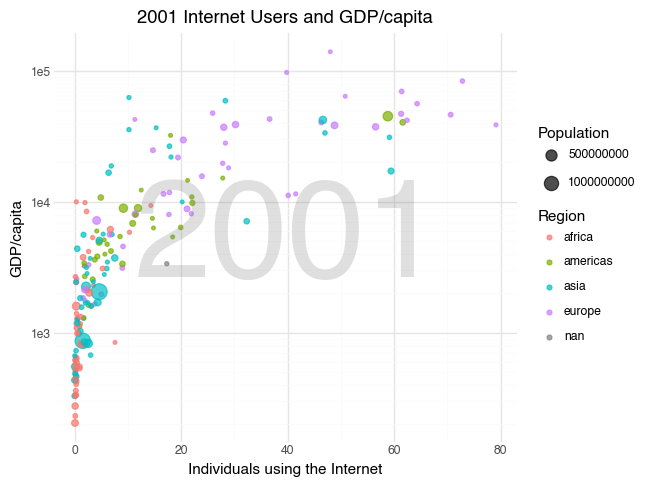

In [ ]:
# Creating Task 3 Plot_ geom_plot

from plotnine import geom_point, annotate, scale_y_log10
(ggplot(q3datamerge, aes(x = "internet_users", y = "gdp", size = "population", color = "four_regions", label = "country"))
+geom_point(alpha = 0.7)
+scale_y_log10()
+labs(
    title = "2001 Internet Users and GDP/capita",
    x = "Individuals using the Internet",
    y = "GDP/capita",
    size = "Population",
    color = "Region"
)
+theme_minimal()
+annotate(
    'text',
        x=40,      
        y=5000,         
        label='2001',
        size=100,      # size
        alpha=0.25,    # transparency
        color='gray')
)

Besides geom_point, you could use 2d geometries like geom_density_2d, geom_bin2d, geom_smooth, or geom_hex. 

Below is the plot for geom_smooth. The geom_smooth geometry is beneficial because it shows the relationship between different regions and the relationship between amount of internet users and gdp/capita. The lines make this easy to visualize. However, it does not show the individual countries. It is also important to know that the relationship is due to causation with certainty. 

/opt/anaconda3/lib/python3.13/site-packages/plotnine/stats/smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/stats/smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/stats/smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/stats/smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/opt/anaconda3/lib/python3.13/site-packages/plotnine/stats/smoothers.py:345: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


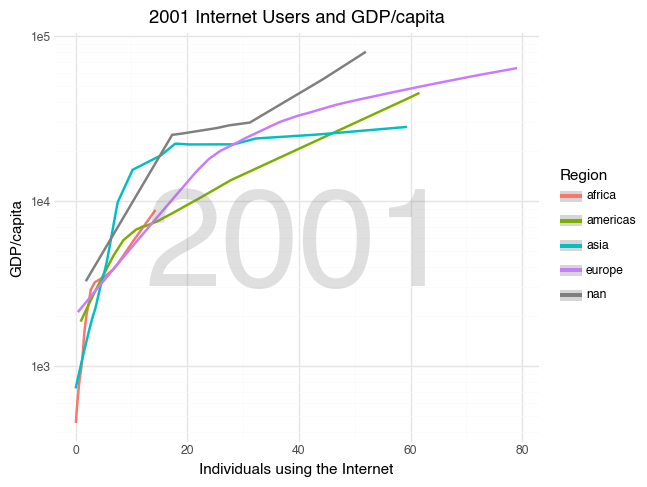

In [ ]:
# Creating Tas 3 Alternative Plot- geom_smooth

from plotnine import geom_point, geom_smooth, annotate, scale_y_log10
(ggplot(q3datamerge, aes(x = "internet_users", y = "gdp", size = "population", color = "four_regions", label = "country"))
+geom_smooth()
+scale_y_log10()
+labs(
    title = "2001 Internet Users and GDP/capita",
    x = "Individuals using the Internet",
    y = "GDP/capita",
    size = "Population",
    color = "Region"
)
+theme_minimal()
+annotate(
    'text',
        x=40,      
        y=5000,         
        label='2001',
        size=100,      # size
        alpha=0.25,    # transparency
        color='gray')
)